In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Section 1 — Data Understanding & Cleaning

In [2]:
df=pd.read_csv("retail_sales.csv")
df

,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel
0,100000,06/25/2023,Bengaluru,South,Beauty,Face Wash,1.0,11521.49,0.0,11521.49,11521.49,NaN,New,Online
1,100001,2024-05-17,Kolkata,East,Beauty,Face Wash,2.0,22032.78,15.0,18727.86,37455.72,Credit Card,NaN,Online
2,100002,NaN,Mumbai,West,Fashion,T-Shirt,-1.0,48903.88,10.0,44013.49,-44013.49,NaN,Returning,Online
3,100003,2024-02-03,MUMBAI,NaN,Fashion,Jacket,1.0,13340.77,0.0,13340.77,13340.77,Cash on Delivery,NaN,In-Store
4,100004,12/12/2023,Bangalore,NaN,Beauty,Moisturizer,3.0,3788.15,5.0,3598.74,10796.22,NaN,Returning,In-Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149995,06/15/2024,Mumbai,West,Home & Kitchen,Cookware Set,3.0,46706.12,0.0,46706.12,140118.36,Debit Card,New,Online
49996,149996,09/10/2023,Kolkata,East,Home & Kitchen,Vacuum Cleaner,-1.0,10661.07,0.0,10661.07,-10661.07,UPI,Returning,In-Store
49997,100012,04-03-2024,Bengaluru,South,Beauty,Perfume,2.0,46032.22,15.0,39127.39,78254.78,Cash on Delivery,NaN,Online
49998,149998,01-01-2024,NaN,NaN,Electronics,Smartphone,NaN,32082.46,NaN,NaN,NaN,Credit Card,Returning,Online


In [3]:
df.columns

Index(['order_id', 'order_date', 'city', 'region', 'category', 'product',
       'quantity', 'unit_price', 'discount_percent', 'final_unit_price',
       'revenue', 'payment_method', 'customer_type', 'sales_channel'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        37513 non-null  object 
 2   city              45501 non-null  object 
 3   region            31694 non-null  object 
 4   category          50000 non-null  object 
 5   product           50000 non-null  object 
 6   quantity          41829 non-null  float64
 7   unit_price        49484 non-null  float64
 8   discount_percent  41574 non-null  float64
 9   final_unit_price  34742 non-null  float64
 10  revenue           34742 non-null  float64
 11  payment_method    40117 non-null  object 
 12  customer_type     33383 non-null  object 
 13  sales_channel     50000 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 5.3+ MB


In [6]:
df.describe()

,order_id,quantity,unit_price,discount_percent,final_unit_price,revenue
count,50000.000000,41829.000000,49484.000000,41574.000000,34742.000000,3.474200e+04
mean,124939.148800,1.793756,27782.986800,9.966085,25046.888110,4.507099e+04
std,14466.366909,1.725868,32843.593955,7.093827,29643.317647,8.482149e+04
min,100000.000000,-1.000000,200.320000,0.000000,160.870000,-4.706587e+05
25%,112407.750000,1.000000,12622.932500,5.000000,11307.677500,5.426790e+03
50%,124932.500000,2.000000,25355.000000,10.000000,22725.705000,3.237925e+04
75%,137471.250000,3.000000,37914.737500,15.000000,33914.985000,7.425028e+04
max,149999.000000,4.000000,498326.780000,20.000000,498326.780000,1.707576e+06


##  IN Data Analysis What All Things We Do

1. Missing Values
2. Explore About Categorical variables
3. Explore About Categorical Variables
4. Finding Relationship Between Features

In [8]:
df.isnull().sum()

order_id                0
order_date          12487
city                 4499
region              18306
category                0
product                 0
quantity             8171
unit_price            516
discount_percent     8426
final_unit_price    15258
revenue             15258
payment_method       9883
customer_type       16617
sales_channel           0
dtype: int64

1) How many rows and columns are present?

In [10]:
df.shape

(50000, 14)

2) Percentage of missing values in each column

In [11]:
(df.isnull().mean()*100).round(2)

order_id             0.00
order_date          24.97
city                 9.00
region              36.61
category             0.00
product              0.00
quantity            16.34
unit_price           1.03
discount_percent    16.85
final_unit_price    30.52
revenue             30.52
payment_method      19.77
customer_type       33.23
sales_channel        0.00
dtype: float64

3. Columns with highest data quality issues

In [14]:
df.isnull().sum().sort_values(ascending=False)

region              18306
customer_type       16617
final_unit_price    15258
revenue             15258
order_date          12487
payment_method       9883
discount_percent     8426
quantity             8171
city                 4499
unit_price            516
product                 0
category                0
order_id                0
sales_channel           0
dtype: int64

4.How many duplicate order IDs?

In [15]:
df['order_id'].duplicated().sum()

np.int64(110)

5. How many invalid or negative quantities?

In [16]:
(df['quantity'] <= 0).sum()

np.int64(8443)

6. Records with missing or incorrect dates

In [19]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_date'].isnull().sum()

np.int64(37425)

7. List inconsistent city name variations

In [20]:
df['city'].value_counts()

city
delhi        4645
MUMBAI       4636
Pune         4582
Chennai      4582
Bengaluru    4556
Delhi        4541
Bangalore    4526
Hyderabad    4483
Kolkata      4478
Mumbai       4472
Name: count, dtype: int64

In [21]:
df['city'].str.lower().str.strip().value_counts()

city
delhi        9186
mumbai       9108
chennai      4582
pune         4582
bengaluru    4556
bangalore    4526
hyderabad    4483
kolkata      4478
Name: count, dtype: int64

8. Rows with extreme price outliers (IQR method)

In [24]:
Q1 = df['final_unit_price'].quantile(0.25)
Q3 = df['final_unit_price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['final_unit_price'] < Q1 - 1.5*IQR) | (df['final_unit_price'] > Q3 + 1.5*IQR)]
outliers

,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel
41,100041,NaT,Chennai,South,Fashion,Jacket,2.0,285198.56,15.0,242418.78,484837.56,Credit Card,New,Online
45,100045,NaT,NaN,NaN,Fashion,Sneakers,3.0,166200.56,0.0,166200.56,498601.68,NaN,New,Online
273,100273,2024-12-12,delhi,NaN,Home & Kitchen,Cookware Set,3.0,139005.81,15.0,118154.94,354464.82,Debit Card,New,Online
626,100626,NaT,NaN,NaN,Electronics,Headphones,-1.0,153015.50,20.0,122412.40,-122412.40,Credit Card,Returning,In-Store
669,100669,NaT,Kolkata,East,Home & Kitchen,Water Purifier,2.0,477872.04,0.0,477872.04,955744.08,Credit Card,Returning,In-Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49649,149649,NaT,Bengaluru,South,Home & Kitchen,Vacuum Cleaner,4.0,252743.42,20.0,202194.74,808778.96,Debit Card,NaN,Online
49661,149661,2023-10-30,Kolkata,East,Home & Kitchen,Mixer Grinder,1.0,300873.17,0.0,300873.17,300873.17,Cash on Delivery,New,In-Store
49793,149793,NaT,Chennai,South,Electronics,Smartwatch,3.0,458605.12,15.0,389814.35,1169443.05,Debit Card,NaN,Online
49930,149930,NaT,MUMBAI,NaN,Electronics,Smartwatch,3.0,432850.82,20.0,346280.66,1038841.98,Credit Card,New,In-Store


9. Rows with missing revenue values

In [26]:
df['revenue'].isnull().sum()

np.int64(15258)

10. After cleaning, how many valid transactions remain?

In [28]:
clean_df = df.dropna()
clean_df = clean_df[clean_df['quantity'] > 0]

In [29]:
clean_df.shape[0]

2353

## Section 2 — Descriptive EDA


1. Total revenue generated

In [31]:
df['revenue'].sum()

np.float64(1565856303.79)

2. Average order value (AOV)

In [32]:
df.groupby('order_id')['revenue'].sum().mean()

np.float64(31386.175662256963)

In [33]:
df['revenue'].mean()

np.float64(45070.9891137528)

3. City with highest revenue

In [34]:
df.groupby('city')['revenue'].sum().sort_values(ascending=False).head(1)

city
Kolkata    1.469084e+08
Name: revenue, dtype: float64

4. Best performing region

In [35]:
df.groupby('region')['revenue'].sum().sort_values(ascending=False).head(1)

region
South    4.171997e+08
Name: revenue, dtype: float64

5. Top 10 selling products by revenue

In [36]:
df.groupby('product')['revenue'].sum().sort_values(ascending=False).head(10)

product
Smartwatch        1.033898e+08
Mixer Grinder     1.025541e+08
Jeans             1.018996e+08
T-Shirt           1.016934e+08
Face Wash         1.016844e+08
Water Purifier    9.896318e+07
Jacket            9.841251e+07
Sneakers          9.818181e+07
Laptop            9.743855e+07
Vacuum Cleaner    9.741975e+07
Name: revenue, dtype: float64

6. Category contributing most to revenue

In [38]:
df.groupby('category')['revenue'].sum().sort_values(ascending=False).head(1)

category
Fashion    4.001874e+08
Name: revenue, dtype: float64

7.  Least performing category

In [40]:
df.groupby('category')['revenue'].sum().sort_values().head(1)

category
Electronics    3.863405e+08
Name: revenue, dtype: float64

8. Median quantity per order

In [42]:
df['quantity'].median()

np.float64(2.0)

9. Most frequently used payment method

In [43]:
df['payment_method'].value_counts().head(1)

payment_method
Credit Card    10242
Name: count, dtype: int64

10. % of sales: Online vs In-store

In [45]:
(df['sales_channel'].value_counts(normalize=True) * 100).round(2)

sales_channel
In-Store    50.09
Online      49.91
Name: proportion, dtype: float64

## Section 3 — Time-based Analysis


In [46]:
1 . What is the monthly revenue trend?

Object `trend` not found.


In [47]:
monthly_revenue = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum()
monthly_revenue

order_date
2023-01    15624541.99
2023-02    14262940.22
2023-03    15660066.41
2023-04    15156212.77
2023-05    15789032.07
2023-06    16980054.79
2023-07    13909177.86
2023-08    15811602.54
2023-09    18339706.69
2023-10    16640109.44
2023-11    18445487.63
2023-12    17244744.94
2024-01    15731295.08
2024-02    14433464.73
2024-03    17020558.42
2024-04    13690888.97
2024-05    17071849.80
2024-06    13954313.26
2024-07    16875322.70
2024-08    21193748.74
2024-09    14486706.45
2024-10    18898196.00
2024-11    13604216.57
2024-12    14702784.76
Freq: M, Name: revenue, dtype: float64

In [48]:
2. Which month has the highest sales?

Object `sales` not found.


In [49]:
monthly_revenue.idxmax(), monthly_revenue.max()

(Period('2024-08', 'M'), np.float64(21193748.740000002))

In [51]:
# 3. Which month has the lowest sales?
monthly_revenue.idxmin(), monthly_revenue.min()

(Period('2024-11', 'M'), np.float64(13604216.57))

In [52]:
# 4. Is there any seasonality pattern in sales?

df['month'] = df['order_date'].dt.month
df.groupby('month')['revenue'].mean()

month
1.0     40721.866325
2.0     43611.557675
3.0     44103.407328
4.0     40687.026432
5.0     44466.687240
6.0     42845.385111
7.0     39568.766787
8.0     52120.213070
9.0     47712.809797
10.0    48483.363492
11.0    44206.488552
12.0    41275.878165
Name: revenue, dtype: float64

In [53]:
# 5. How does Average Order Value (AOV) change month-to-month?
monthly_aov = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].mean()
monthly_aov

order_date
2023-01    39356.528942
2023-02    45423.376497
2023-03    43621.354903
2023-04    42693.557099
2023-05    42673.059649
2023-06    43538.602026
2023-07    35035.712494
2023-08    45963.960872
2023-09    54420.494629
2023-10    45340.897657
2023-11    47175.160179
2023-12    45621.018360
2024-01    42175.053834
2024-02    41957.746308
2024-03    44556.435654
2024-04    38674.827599
2024-05    46265.175610
2024-06    42031.064036
2024-07    44292.185564
2024-08    57906.417322
2024-09    41272.667949
2024-10    51634.415301
2024-11    40731.187335
2024-12    37128.244343
Freq: M, Name: revenue, dtype: float64

In [54]:
# 6. Are weekend sales higher than weekday sales?
df['day_type'] = df['order_date'].dt.dayofweek.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)


df.groupby('day_type')['revenue'].sum()

day_type
Weekday    1.447961e+09
Weekend    1.178953e+08
Name: revenue, dtype: float64

In [55]:
# 7. Which quarter contributes most revenue?
df['quarter'] = df['order_date'].dt.to_period('Q')
df.groupby('quarter')['revenue'].sum().sort_values(ascending=False)

quarter
2024Q3    52555777.89
2023Q4    52330342.01
2023Q3    48060487.09
2023Q2    47925299.63
2024Q4    47205197.33
2024Q1    47185318.23
2023Q1    45547548.62
2024Q2    44717052.03
Freq: Q-DEC, Name: revenue, dtype: float64

## Section 4 — Customer Behavior


In [57]:
# 1. Do returning customers spend more than new customers?

df.groupby('customer_type')['revenue'].mean()

customer_type
New          45998.377666
Returning    45298.676305
Name: revenue, dtype: float64

In [58]:
# 2. Which customer type generates more revenue share?

revenue_share = df.groupby('customer_type')['revenue'].sum()
(revenue_share / revenue_share.sum() * 100).round(2)

customer_type
New          50.41
Returning    49.59
Name: revenue, dtype: float64

In [59]:
# 3. Average quantity per customer type
df.groupby('customer_type')['quantity'].mean()

customer_type
New          1.798677
Returning    1.798862
Name: quantity, dtype: float64

In [61]:
# 4.  City with highest returning-customer ratio

# Steps:
# Count customers per city
# Calculate returning ratio

city_customer = df.groupby(['city', 'customer_type']).size().unstack(fill_value=0)


city_customer['returning_ratio'] = (
    city_customer['Returning'] /
    (city_customer['Returning'] + city_customer['New'])
)


city_customer.sort_values('returning_ratio', ascending=False).head(1)

customer_type,New,Returning,returning_ratio
city,,,
MUMBAI,1532,1610,0.512412


In [62]:
# 5. Are discounts more common for new customers?

df.groupby('customer_type')['discount_percent'].mean()

customer_type
New          10.031424
Returning     9.954815
Name: discount_percent, dtype: float64

## Section 5 — Pricing & Discount Insights


In [63]:
# 1. What is the average discount percentage overall?
df['discount_percent'].mean()

np.float64(9.966084572088324)

In [64]:
# 2. Which category gives the highest discounts?
df.groupby('category')['discount_percent'].mean() \
  .sort_values(ascending=False)

category
Beauty            9.994214
Electronics       9.987483
Home & Kitchen    9.943636
Fashion           9.939170
Name: discount_percent, dtype: float64

In [67]:
# 3. Do higher discounts increase revenue?

#Compare discount vs revenue (trend idea):

df[['discount_percent', 'revenue']].corr()

,discount_percent,revenue
discount_percent,1.000000,-0.042462
revenue,-0.042462,1.000000


In [68]:
# 4.Correlation between discount, price, and quantity
df[['discount_percent', 'final_unit_price', 'quantity', 'revenue']].corr()

,discount_percent,final_unit_price,quantity,revenue
discount_percent,1.000000,-0.065101,-0.005984,-0.042462
final_unit_price,-0.065101,1.000000,0.002240,0.628008
quantity,-0.005984,0.002240,1.000000,0.509641
revenue,-0.042462,0.628008,0.509641,1.000000


In [70]:
# 5. Identify loss-making or suspicious transactions
# Case 1: Revenue ≤ 0
loss_transactions = df[df['revenue'] <= 0]
loss_transactions
# Case 2: Very high discount (e.g. > 70%)
high_discount = df[df['discount_percent'] > 70]
high_discount
# Case 3: Final price greater than original price
price_issue = df[df['final_unit_price'] > df['unit_price']]
price_issue

,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel,month,day_type,quarter


## Section 6 — Geographic Insights

In [71]:
# 1. Top 5 cities contributing most revenue
df.groupby('city')['revenue'].sum() \
  .sort_values(ascending=False) \
  .head(5)

city
Kolkata      1.469084e+08
delhi        1.468362e+08
Bangalore    1.438229e+08
Bengaluru    1.438145e+08
Pune         1.434957e+08
Name: revenue, dtype: float64

In [72]:
# 2. Lowest performing region
df.groupby('region')['revenue'].sum() \
  .sort_values() \
  .head(1)

region
North    1.387458e+08
Name: revenue, dtype: float64

In [73]:
# 3. Category preference differences across regions

# Revenue by category within each region

df.pivot_table(
    values='revenue',
    index='region',
    columns='category',
    aggfunc='sum'
)

category,Beauty,Electronics,Fashion,Home & Kitchen
region,,,,
East,4.059366e+07,3.248207e+07,3.544196e+07,3.839068e+07
North,3.406991e+07,3.604584e+07,3.246233e+07,3.616769e+07
South,1.028909e+08,1.068161e+08,1.058163e+08,1.016764e+08
West,6.710999e+07,6.802107e+07,7.587305e+07,6.935880e+07


In [74]:
# 4. Which city buys most Electronics?
df[df['category'] == 'Electronics'] \
  .groupby('city')['revenue'].sum() \
  .sort_values(ascending=False) \
  .head(1)

city
Chennai    40716799.58
Name: revenue, dtype: float64

In [75]:
# 5. Which city prefers Fashion products?
df[df['category'] == 'Fashion'] \
  .groupby('city')['revenue'].sum() \
  .sort_values(ascending=False) \
  .head(1)

city
Pune    42331337.39
Name: revenue, dtype: float64

## Section 7 — Outliers & Anomaly Detection

In [77]:
# 1. Detect price outliers using IQR (recommended)
#Step-1: Calculate IQR on final_unit_price
Q1 = df['final_unit_price'].quantile(0.25)
Q3 = df['final_unit_price'].quantile(0.75)
IQR = Q3 - Q1

In [78]:
## Step-2: Identify outliers
price_outliers = df[
    (df['final_unit_price'] < Q1 - 1.5 * IQR) |
    (df['final_unit_price'] > Q3 + 1.5 * IQR)
]


price_outliers

,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel,month,day_type,quarter
41,100041,NaT,Chennai,South,Fashion,Jacket,2.0,285198.56,15.0,242418.78,484837.56,Credit Card,New,Online,NaN,Weekday,NaT
45,100045,NaT,NaN,NaN,Fashion,Sneakers,3.0,166200.56,0.0,166200.56,498601.68,NaN,New,Online,NaN,Weekday,NaT
273,100273,2024-12-12,delhi,NaN,Home & Kitchen,Cookware Set,3.0,139005.81,15.0,118154.94,354464.82,Debit Card,New,Online,12.0,Weekday,2024Q4
626,100626,NaT,NaN,NaN,Electronics,Headphones,-1.0,153015.50,20.0,122412.40,-122412.40,Credit Card,Returning,In-Store,NaN,Weekday,NaT
669,100669,NaT,Kolkata,East,Home & Kitchen,Water Purifier,2.0,477872.04,0.0,477872.04,955744.08,Credit Card,Returning,In-Store,NaN,Weekday,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49649,149649,NaT,Bengaluru,South,Home & Kitchen,Vacuum Cleaner,4.0,252743.42,20.0,202194.74,808778.96,Debit Card,NaN,Online,NaN,Weekday,NaT
49661,149661,2023-10-30,Kolkata,East,Home & Kitchen,Mixer Grinder,1.0,300873.17,0.0,300873.17,300873.17,Cash on Delivery,New,In-Store,10.0,Weekday,2023Q4
49793,149793,NaT,Chennai,South,Electronics,Smartwatch,3.0,458605.12,15.0,389814.35,1169443.05,Debit Card,NaN,Online,NaN,Weekday,NaT
49930,149930,NaT,MUMBAI,NaN,Electronics,Smartwatch,3.0,432850.82,20.0,346280.66,1038841.98,Credit Card,New,In-Store,NaN,Weekday,NaT


In [80]:
# 2. Detect abnormally high revenue orders

Q1_r = df['revenue'].quantile(0.25)
Q3_r = df['revenue'].quantile(0.75)
IQR_r = Q3_r - Q1_r


high_revenue_orders = df[df['revenue'] > Q3_r + 1.5 * IQR_r]
high_revenue_orders

,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel,month,day_type,quarter
12,100012,NaT,Kolkata,East,Beauty,Face Wash,4.0,47516.45,0.0,47516.45,190065.80,Cash on Delivery,New,Online,NaN,Weekday,NaT
41,100041,NaT,Chennai,South,Fashion,Jacket,2.0,285198.56,15.0,242418.78,484837.56,Credit Card,New,Online,NaN,Weekday,NaT
45,100045,NaT,NaN,NaN,Fashion,Sneakers,3.0,166200.56,0.0,166200.56,498601.68,NaN,New,Online,NaN,Weekday,NaT
51,100051,NaT,Pune,West,Fashion,Sneakers,4.0,46967.75,5.0,44619.36,178477.44,Cash on Delivery,Returning,In-Store,NaN,Weekday,NaT
273,100273,2024-12-12,delhi,NaN,Home & Kitchen,Cookware Set,3.0,139005.81,15.0,118154.94,354464.82,Debit Card,New,Online,12.0,Weekday,2024Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49758,149758,2024-09-17,NaN,NaN,Home & Kitchen,Cookware Set,4.0,47268.94,5.0,44905.49,179621.96,NaN,New,In-Store,9.0,Weekday,2024Q3
49793,149793,NaT,Chennai,South,Electronics,Smartwatch,3.0,458605.12,15.0,389814.35,1169443.05,Debit Card,NaN,Online,NaN,Weekday,NaT
49880,149880,2023-11-04,MUMBAI,NaN,Home & Kitchen,Water Purifier,4.0,44514.67,0.0,44514.67,178058.68,UPI,NaN,Online,11.0,Weekend,2023Q4
49930,149930,NaT,MUMBAI,NaN,Electronics,Smartwatch,3.0,432850.82,20.0,346280.66,1038841.98,Credit Card,New,In-Store,NaN,Weekday,NaT


In [81]:
# 3. Are outliers data errors or real premium sales?

high_revenue_orders[['final_unit_price', 'quantity', 'discount_percent']]

,final_unit_price,quantity,discount_percent
12,47516.45,4.0,0.0
41,242418.78,2.0,15.0
45,166200.56,3.0,0.0
51,44619.36,4.0,5.0
273,118154.94,3.0,15.0
...,...,...,...
49758,44905.49,4.0,5.0
49793,389814.35,3.0,15.0
49880,44514.67,4.0,0.0
49930,346280.66,3.0,20.0


In [89]:
# 4. Impact of removing outliers on average revenue
#Before removing outliers
avg_revenue_before = df['revenue'].mean()
avg_revenue_before
#Remove revenue outliers
df_no_outliers = df[
    (df['revenue'] >= Q1_r - 1.5 * IQR_r) &
    (df['revenue'] <= Q3_r + 1.5 * IQR_r)
]
#After removing outliers
avg_revenue_after = df_no_outliers['revenue'].mean()
avg_revenue_after
#Compare
avg_revenue_before - avg_revenue_after

np.float64(5670.546730386253)

## Section 8 — Visualization Tasks

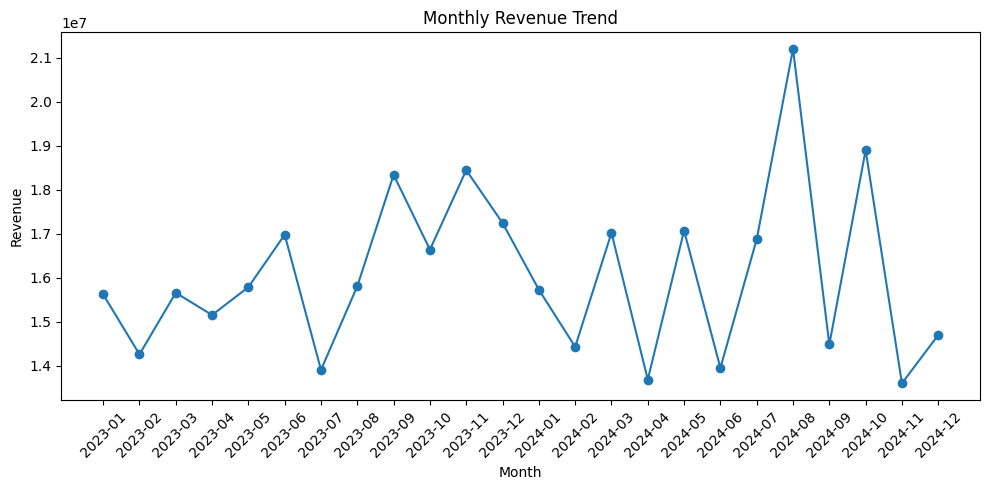

In [90]:
# 1. Monthly revenue line chart
monthly_revenue = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum()
monthly_revenue.index = monthly_revenue.index.astype(str)


plt.figure(figsize=(10,5))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

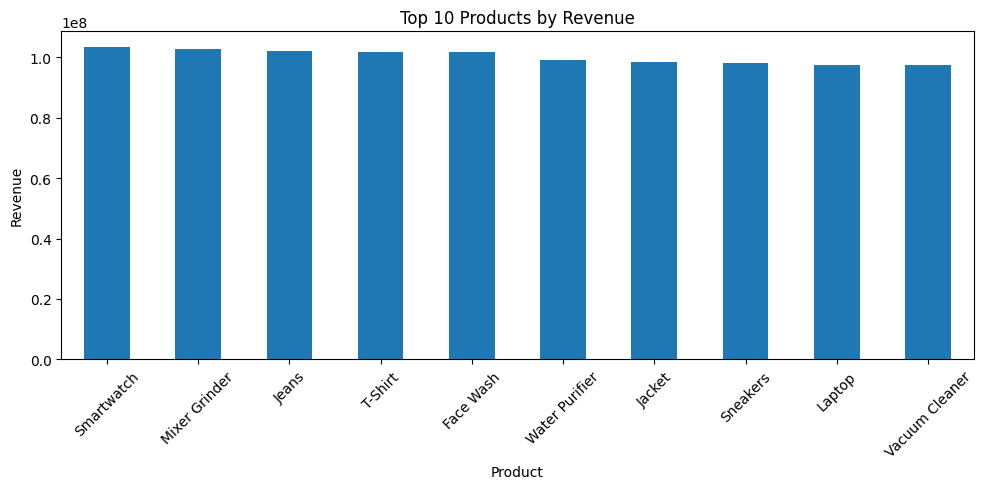

In [91]:
# 2. Top products bar chart (Top 10)
top_products = (
    df.groupby('product')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)


plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

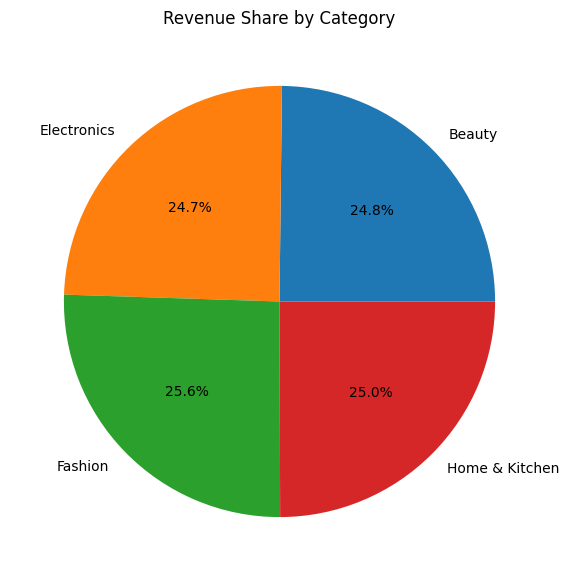

In [92]:
# 3. Category revenue pie chart
category_revenue = df.groupby('category')['revenue'].sum()


plt.figure(figsize=(7,7))
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%')
plt.title('Revenue Share by Category')
plt.show()

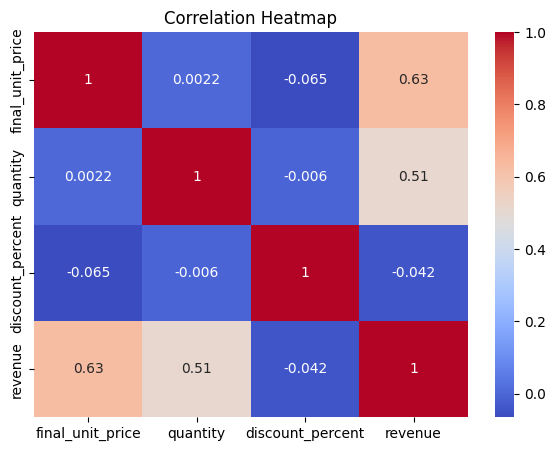

In [93]:
# 4.Correlation heatmap
corr_matrix = df[
    ['final_unit_price', 'quantity', 'discount_percent', 'revenue']
].corr()


plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

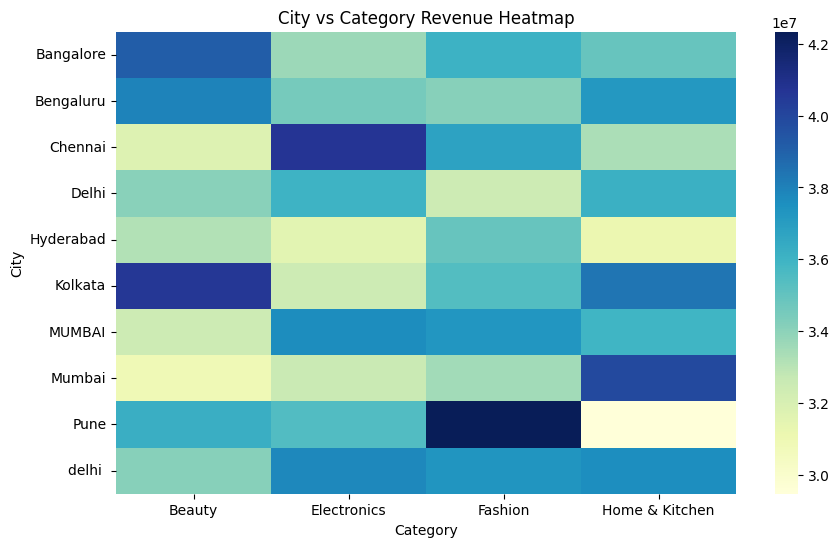

In [94]:
# 5. City vs Category pivot visualization
city_category = pd.pivot_table(
    df,
    values='revenue',
    index='city',
    columns='category',
    aggfunc='sum'
)


plt.figure(figsize=(10,6))
sns.heatmap(city_category, cmap='YlGnBu')
plt.title('City vs Category Revenue Heatmap')
plt.xlabel('Category')
plt.ylabel('City')
plt.show()

